In [11]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier
import pandas as pd
import matplotlib as mpl
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import os


import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [14]:
_  = os.path.join('pima-indians-diabetes-database', 'diabetes.csv')
df = pd.read_csv(_)

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


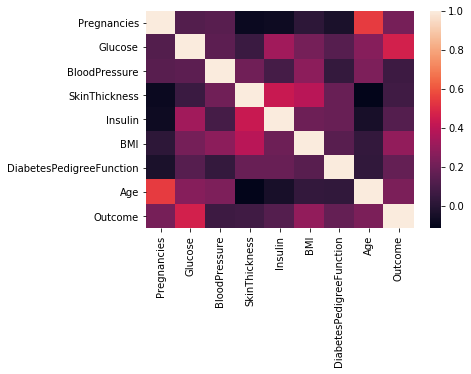

In [13]:
sns.heatmap(df.corr());

In [16]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
abc = AdaBoostClassifier(random_state=42)
abc.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [37]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [25]:
display(pd.DataFrame(confusion_matrix(y_test, gbc.predict(x_test))))

display(pd.DataFrame(confusion_matrix(y_test, abc.predict(x_test))))

,0,1
0,123,0
1,1,68


,0,1
0,96,27
1,26,43


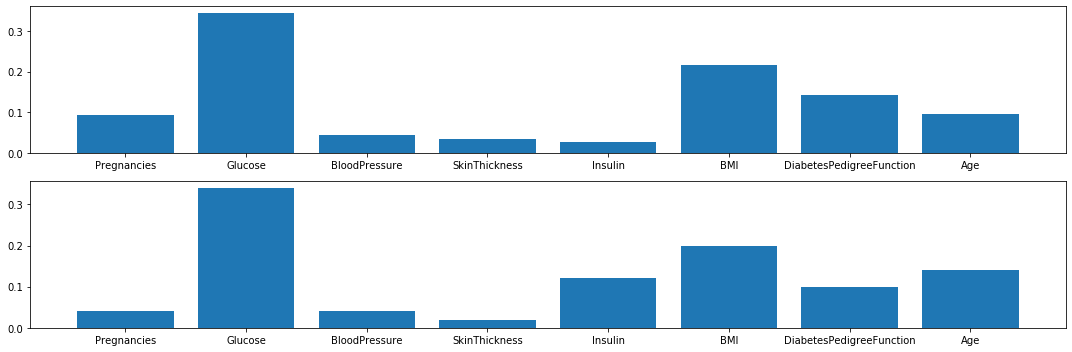

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 5))

ax[0].bar(height=gbc.feature_importances_, x=x_train.columns)
ax[1].bar(height=abc.feature_importances_, x=x_train.columns)
plt.tight_layout()

In [38]:
gbc.feature_importances_

array([0.03471645, 0.44372415, 0.03143472, 0.02116224, 0.05485079,
       0.16768921, 0.10225958, 0.14416286])

In [39]:
x_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')